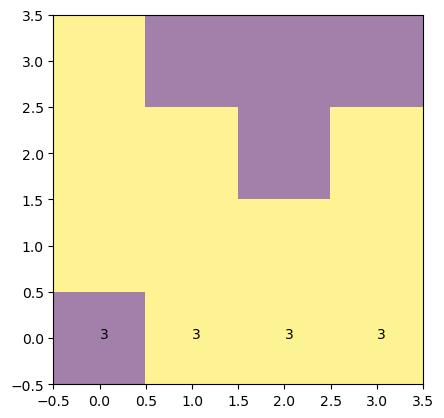

In [11]:
import numpy as np
from matplotlib import pyplot as plt

gridSize=5
nPlayers=2
S = np.zeros((gridSize-1, gridSize-1, 2), dtype=int)
S[:,:,0] = np.random.randint(nPlayers, size=(gridSize-1, gridSize-1))     # territory ownership
S[:,:,1] += 3  

plt.imshow(S[:,:,0], alpha=0.5, origin='lower')
for x in range(gridSize-1):
    for y in range(gridSize-1):
        if y == 0:
            plt.text(x,y,S[x,y,1])
# plt.tick_params(left = False, right = False , labelleft = False ,
#                 labelbottom = False, bottom = False)



In [4]:
a = (1,2,'a')